Utilisons le jeu de données MNIST qui est composé de 70 000 petites images de chiffres écrits à la main par des lycéens et des employés des services de recensement américains. L'étiquette associée à chaque image est simplement le chiffre représenté. Ce jeu de données a été si souvent étudié qu'on l'appelle souvent le « Hello world » du Machine Learning : chaque fois que quelqu'un propose un nouvel algorithme de classification, il s'empresse de voir ce qu'il donne sur le MNIST. Quiconque s'initie au Machine Learning finit tôt ou tard par s'attaquer au MNIST. 

# 1. Introduction

## 1.1 Récupération du jeu de données MNIST

Le code qui suit récupère le "Real word dataset" MNIST.

In [4]:
#from sklearn.datasets import fetch_mldata # Package sklearn.datasets, fonction sklearn.datasets.fetch_mldata 
#mnist = fetch_mldata(dataname='MNIST original') # target_name='label',data_name='data',transpose_data='True', data_home=None

Remarque. fetch_mldata() est obsolète depuis Scikit-Learn 0.20. Il convient plutôt d'utiliser fetch_openml(). Toutefois, cela renvoie le jeu de données MINST désordonné alors que fetch_mldata() renvoie le jeu de données triés par target (les jeux d'entrainement et de test sont triés séparément). En général cela ne pose pas de problème, mais si vous souhaitez obtenir exactement le même résultat qu'avec fetch_mldata() vous devez triés les données en utilisant la fonction suivante.

In [8]:
import numpy as np

In [9]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [10]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
sort_by_target(mnist) # fetch_openml() returns an unsorted dataset

## 1.2. Exploration du jeu de données

In [11]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array([0, 0, 0, ..., 9, 9, 9], dtype=int8),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel

On peut évidemment accéder séparément aux éléments séparément : 
mnist.data, mnist.target, mnist.frame, mnist.categories, mnist.feature_names, mnist.target_names, mnist. DESCR...

# 1.2.1. Les tableaux 'data' et 'target'

Voyons ces tableaux.

In [24]:
X, y = mnist.data, mnist.target # ou X, y = mnist["data"], mnist["target"]

#### 1.2.1.1. Le tableau 'data'

In [12]:
mnist.data # ou mnist["data"]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
mnist.data.shape # ou mnist["data"].shape

(70000, 784)

Il y a 70 000 images comportant chacune 784 valeurs. Ceci parce que chaque image comporte 28 x 28 pixels et chaque valeur représente simplement l'intensité d'un pixel, de 0 (blanc) à 255 (noir). 

#### 1.2.1.2. Le tableau 'target'

In [17]:
mnist.target # ou mnist["target"]

array([0, 0, 0, ..., 9, 9, 9], dtype=int8)

In [26]:
mnist.target.shape # ou mnist["target"]

(70000,)

### 1.2.1. Chiffres figurant dans le jeu de données MNIST

Examinons l'un des chiffres de ce jeu de données. Il vous suffit de récupérer le vecteur des valeurs (ou caractéristiques) d'une observation, de le convertir en tableau 28 x 28 et de l'afficher en utilisant la fonction imshow() de Matplotlib :

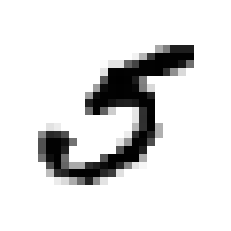

In [28]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28) # order='C'
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest") # Par défaut cmap=None, interpolation=None
plt.axis("off") # Enlève les lignes et le nom des axes
#save_fig("some_digit_plot")
plt.show()

Ca ressemble à un 5, et c'est bien ce qu'indique l'étiquette :

In [29]:
y[36000]

5

La figure suivante vous presente quelques autres images du jeu de données MNIST pour vous sensibiliser à la complexité de la tâche de classification :

In [32]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

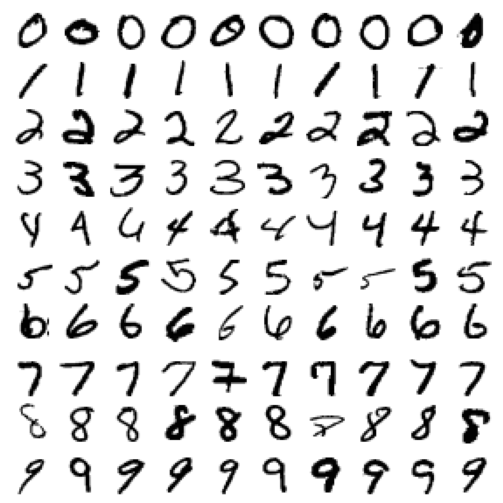

In [33]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

## 1.3. Jeu d'entrainement, jeu de test et mélange

Mais attendez! Avant d'inspecter les données, vous devez toujours créer d'abord un jeu de test et le mettre de côté. En pratique, les données MNIST sont déjà partagées entre un jeu d'entraînement (les 60 000 premières images) et un jeu de test (les 10 000 dernières images) :

In [34]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 
# Rappel [:60000] extrait de l'indice 0 à l'indice 59999 (borne gauche incluse et borne droite exclue)

Mélangeons aussi le jeu d'entraînement: ceci évitera qu'il manque des chiffres dans certains échantillons. 

In [35]:
shuffle_index = np.random.permutation(60000) # Retourne un vecteur avec les nombres de 1 à 59999 dans un ordre aléatoire
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index] # Récupère toutes les lignes dans l'ordre de shuffle_index

# 2. Classificateur binaire 

Nous allons simplifier le problème pour l'instant en nous contentant d'identifier un chiffre, par exemple le 5. Ce « détecteur de 5 » sera un exemple de classificateur binaire capable d'effectuer la distinction entre deux classes uniquement, 5 et non-5. Créons les deux vecteurs cible pour cette tâche de classification :

In [36]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

Maintenant, choisissons un classiicateur et entrainons-le.

## 2.1. SGDClassifier

Créons un SGDClassifier et entraînons-le sur l'ensemble du jeu d'entraînement :

In [37]:
from sklearn.linear_model import SGDClassifier # class sklearn.linear_model.SGDClassifier
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42) # Par défaut max_iter = 1000, tol=1e-3 
sgd_clf.fit(X_train, y_train_5) # Pour chaque ligne de X_train, apprend si c'est un 5 ou pas

SGDClassifier(max_iter=5, random_state=42, tol=-inf)

Maintenant, vous pouvez l'utiliser pour détecter les images représentant des 5.

In [38]:
sgd_clf.predict([some_digit])

array([ True])

Le classificateur déternmine que cette image représente un 5 (valeur True). Il semble avoir deviné juste dans ce cas particulier !

## 2.2. Mesures de performance

Maintenant, évaluons les performances du modèle.

### 2.2.1. Mesurer l'exactitude à l'aide de la validation croisée

Effectuons une validation croisée. Utilisons la fonction cross_val_score() pour évaluer votre modèle SGDClassifier à l'aide d'une validation croisée à K passes, avec ici K=3. Rappelez-vous qu'une validation croisée à K passes consiste à partager le jeu d'entraînement en K blocs (ici 3), puis à effectuer des prédictions et à les évaluer sur chaque loc en utilisant un modèle entraîné sur le reste des blocs :

In [39]:
from sklearn.model_selection import cross_val_score # Fonction cross_val_score()
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.966  , 0.964  , 0.94425])

Ça alors! Un taux d'exactitude de 95 % sur tous les blocs de validation croisée ! C'est stupéfiant, n'est-ce pas ? Pour modérer votre enthousiasme, examinons d'abord un classificateur dénué de toute intelligence qui se contente de classer chaque image dans la classe « non-5 » :

In [41]:
from sklearn.base import BaseEstimator
class Never5Classifier (BaseEstimator):
    def fit (self, X, y=None):
        pass
    def predict (self, X):
        return np.zeros ((len (X), 1), dtype=bool)

Pouvez-vous deviner le taux d'exactitude de ce modèle ? Voyons voir :

In [43]:
never_5_clf = Never5Classifier()
cross_val_score (never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90875, 0.90735, 0.91285])

Vous avez bien vu, il est supérieur à 90 % ! Cest simplement parce que les 5 ne représentent qu'environ 10 % des images, et donc si vous décidez à chaque fois qu'une image n'est pas un 5, vous aurez raison dans à peu près 90 % des cas. C'est mieux que Nostradamus ! 
Ceci démontre pourquoi l'exactitude n'est pas en général la mesure de performance
de prédilection pour les classificateurs, surtout lorsqu'on a affaire à des jeux de données
asymétriques dans lesquels certaines classes sont bien plus fréquentes que d'autres.


### 2.2.2. Matrice de confusion

Effectons un ensemble de prédictions afin de pouvoir les comparer aux véritables valeurs cibles de y_train_5.

In [44]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Utilisions la fonction confusion_matix() en lui transmettant les classes cibles y_train_5 et les classes prédites (y_train_pred) :

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53371,  1208],
       [ 1307,  4114]], dtype=int64)

Chaque ligne de la matrice de confusion représente une classe réelle, tandis que chaque colonne représente une classe prédite. La première ligne de cette matrice correspond aux images non-5 (la classe négative) : 53 272 de ces images ont éte correctement 
classées en non-5 (on les appelle les vrais négatifs), tandis que les 1 307 restantes ont été classées à tort en 5 (faux positifs). La deuxième ligne de la matrice correspond aux images de 5 (la classe positive) : 1 077 ont été classées par erreur en non-5 (faux négatifs), tandis que les 4 344 restants ont été classés correctement en 5 (vrais positifs). 

Considérons un classificateur parfait :

In [47]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

### 2.2.3. Précision et rappel

In [48]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)
recall_score(y_train_5, y_train_pred)

0.7589005718502121

Maintenant, votre détecteur de 5 ne paraît plus aussi brillant que lorsque vous avez examiné sa précision: lorsqu'il déclare qu'une image est un 5, il n'a raison que 77 % du temps. De plus, il ne détecte que 80 % des 5.

Score F1

In [50]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7658940705575724

Compromis précision/rappel

La figure suivante présente un certain nombre de chiffres s'échelonnant depuis le score le plus faible à gauche jusqu'au score le plus élevé à droite. Supposons que le seuil de décision soit positionné au niveau de la flèche centrale (entre les deux 5) : vous trouverez 4 vrais positifs (vrais 5) à droite de ce seuil, et un faux positif (en fait un 6). Par conséquent, avec ce seuil, la précision et de 8O % (4 sur 5). Mais sur 6 véritables 5, le classificateur n'en détecte que 4, soit un rappel de 67 % (4 sur 6). Maintenant, si vous augmentez le seuil (en déplaçant la flèche vers la droite), le faux positif (le 6) devient maintenant un vrai négatif, accroissant de ce fait la précision (jusqu'à 100 % dans ce cas), mais un vrai positif devient maintenant un faux négatif, faisant baisser ainsi le rappel à 50 %. Inversement, abaisser le seuil accroît le rappel et réduit la précision.

In [51]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([198579.24366417])

In [52]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

Le SGDClassifier utilise un seuil égal à 0, et par conséquent le code ci-dessus renvoie le même résultat que la méthode predict() (à savoir True). Rehaussons maintenant ce seuil :

In [53]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)

Ceci confirme qu'augmenter le seuil fait décroître le rappel : l'image représente effectivement un 5, et le classificateur le détecte lorsque le seuil est 0, mais n'y arrive pas lorsque le seuil est augmenté à 200 000.

In [54]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

#### Méthode 1 - Précision et rappel en fonction du seuil

In [55]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores) # pos_label=None, sample_weight=None

In [56]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])


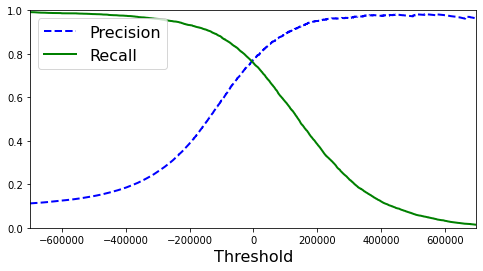

In [58]:
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
#save_fig("precision_recall_vs_threshold_plot")
plt.show()

Remarque. Vous pouvez vous demander pourquoi la courbe de la précision est plus irrégulière  que la courbe du rappel sur la figure précédente. La raison en est que la précision peut parfois diminuer lorsque vous augmentez le seuil (alors qu'en  général elle augmente). Pour comprendre pourquoi, reportez-vous à la figure et remarquez ce qui arrive lorsque vous partez du seuil en position centrale et que vous le déplacez d'un seul chiffre vers la droite : la précision redescend de 4/5 (80 %) à 3/4 (75 %). A l'opposé, le rappel ne peut que diminuer lorsque le seuil augmente, ce qui explique pourquoi sa courbe parait régulière.

Supposons donc que vous décidiez de viser une précision de 90 %. Vous consultez le premier graphique (en zoomant un peu) et vous en concluez que vous devez utiliser un seuil aux alentours de 70 000. Pour effectuer des prédictions (sur le jeu d'entraînement pour l'instant), au lieu d'appeler la méthode predict() du classificateur, vous pouvez exécuter simplement ce code :

In [59]:
y_train_pred_90 = (y_scores > 70000)

Vérifions donc la précision et le rappel de ces prédictions :

In [60]:
precision_score(y_train_5, y_train_pred_90)
recall_score(y_train_5, y_train_pred_90)

0.636782881387198

Très bien, vous avez un classificateur avec une précision de près de 90 % ! 

#### Méthode 2 - Croiser précision avec rappel

In [61]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

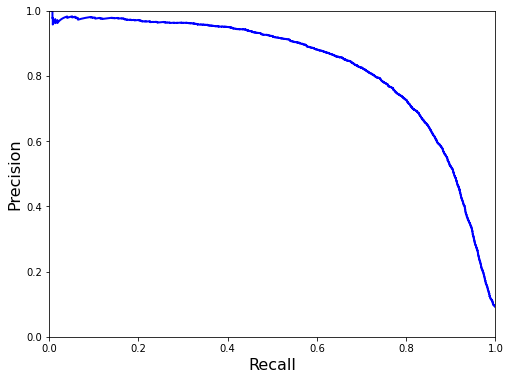

In [63]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
#save_fig("precision_vs_recall_plot")
plt.show()

Vous pouvez voir que la précision commence à chuter brutalement aux environs
de 80 % de rappel. Vous souhaiterez probablement sélectionner un compromis précision/rappel 
juste avant cette chute brutale, par exemple aux alentours d'un rappel de
60 %. Mais, bien sûr, le choix dépend de votre projet.

### 2.2.4. La courbe ROC

In [64]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [65]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

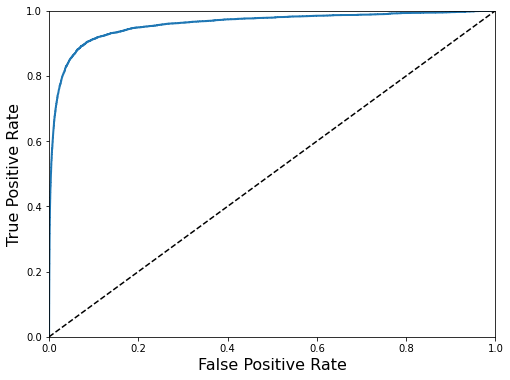

In [66]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
#save_fig("roc_curve_plot")
plt.show()

ROC AUC

In [67]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9590228379220268

Ainsi, en observant la courbe ROC ci-dessus (ainsi que le score ROC AUC), vous pourriez considérer que le classificateur est vraiment bon. Mais c'est essentiellement parce qu'il y a peu de positifs (5) par rapport aux négatifs (non-5). Par contraste, la courbe PR montre clairement que le dlassificateur peut être amélioré (la courbe pourrait se rapprocher davantage du coin supérieur droit.

## 2.3. RandomForestClassifier

Entraînons maintenant un RandomFrestclassifier et comparons sa courbe ROC et son score ROC AUC à ceux du SGDClassifier.

In [68]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42) # On impose n_estimators=10 pour éviter un warning lié à sa valeur par défaut égale à 100 dans Scikit-Learn 0.22.
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [69]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

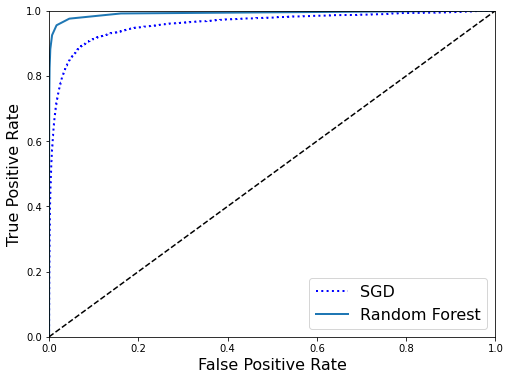

In [70]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

Comme vous pouvez le voir sur la figure, la courbe ROC du RandomForestClassifier semble bien meilleure que celle du SGDClassifier : elle est beaucoup plus proche du coin supérieur gauche. Par suite, son score ROC AUC est aussi nettement meilleur :

In [71]:
roc_auc_score(y_train_5, y_scores_forest)

0.9918850673914188

Mesurez ensuite la précision et le rappel: vous devriez trouver une précision de 98,5 % et un rappel de 82,8 %. Pas mal !

In [72]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)
recall_score(y_train_5, y_train_pred_forest)

0.8243866445305295

Maintenant, essayons de faire un peu mieux que de détecter uniquement des 5...

# 3. Classification multi-classes

## 3.1. Utilisation de plusieurs classificateurs binaires

### 3.1.1. Stratégie un contre tous

Ainsi, pour répartir nos images de chiffres en 10 classes (de 0 à 9), une des méthodes consiste à entraîner 10 classificateurs binaires, un pour chaque chiffre (un détecteur de 0, un détecteur de 1, un détecteur de 2, etc.). Puis, pour classer une autre image, il suffit d'obtenir le score de décision pour cette image de chacun des classificateurs et de sélectionner la classe dont le classificateur vous a fourni le meilleur score. C'est ce qu'on appelle une stratégie un contre tous (one-vs-all ou OvA).

Essayons cela avec le SGDClassifier :

In [74]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([5], dtype=int8)

C'était facile ! Ce code entraîne le SGDCLassltier sur le jeu d'entraînement en utilisant les classes cibles originelles de 0 à 9 (y_train), et non les classes 5-contre-tous (y_train_5). Puis celui-ci effectue une prédiction (corecte dans ce cas). Si l'on regarde sous le capot, Scikit-Learn a en réalité entraîné 10 classificateurs binaires, récupéré leur score de décision pour cette image et selectionné la classe de plus haut score.

Pour vérifier que c'est bien le cas, vous pouvez appeler la méthode decision_function() : au lieu de renvoyer juste un score par observation, elle renvoie 10 scores, un par classe :

In [75]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -67363.10843099, -533238.46426126, -189213.59785125,
        -252527.64071189, -546514.89716649,  129027.30383494,
        -576967.81333888, -448527.75972025, -883583.60160778,
        -489612.68233142]])

Le plus haut score est effectivement celui qui correspond à la classe 5 :

In [76]:
np.argmax (some_digit_scores)

5

Dans notre cas, l'indice de chaque classe dans le tableau classes_ correspond fort heureusement à la classe elle-même (p. ex. la classe à l'indice 5 est justement la classe 5), mais en général vous n'aurez pas tant de chance.

In [77]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [78]:
sgd_clf.classes_[5]

5

### 3.1.2. Stratégie un contre un

Une autre stratégie consiste à entraîner un classifıcateur binaire pour chaque paire de chiffres: un pour distinguer les O des 1, un autre pour distinguer les O des 2, un autre pour distinguer les 1 des 2, etc. C'est ce qu'on appelle une stratégie un contre un (one-vs-one ou OvO). S'il y a N classes, vous devrez entraîner N x (N-1)/2 classificateurs. Pour notre problème MNIST, cela signifie entraîner 45 classificateurs binaires ! Lorsque vous voulez classer une image, vous devez la soumettre aux 45 classificateurs et voir quelle classe remporte le plus de duels.

Ce code crée par exemple un classificateur multi-classes en utilisant une stratégie OvO (un contre un) basée sur un SGDClassifier :

In [79]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5], dtype=int8)

In [80]:
len(ovo_clf.estimators_)

45

## 3.2. RandomForestClassifier

Entraîner un RandomForestClassifier est tout aussi simple :

In [81]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5], dtype=int8)

In [82]:
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

Vous pouvez voir que le classificateur est plutôt confiant dans sa prédiction : le 0,8 pour l'indice 5 du tableau signifie que le modèle estime à 80 % la probabilité que l'image représente un 5. II pense également que l'image pourrait aussi être un 0 ou un 3 (10 % de chances chacun).

Evaluons l'exactitude du SGDClassifier grâce à la fonction cross_val_score () :

In [83]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8612 , 0.8431 , 0.88385])

Il obtient plus de 84 % sur tous les blocs de test. Considérant qu'un classificateur purement aléatoire aurait une exactitude de 10 %, ce résultat n'est donc pas mauvais ; mais il y a moyen de faire beaucoup mieux. Par exemple, en normalisant simplement les données d'entrée, l'exactitude passe au-dessus de 90 % :

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.90855, 0.9123 , 0.90985])

## 3.3. Analyse des erreurs (OvA)

In [85]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5731,    2,   22,    7,   10,   51,   47,   10,   38,    5],
       [   1, 6463,   51,   28,    6,   40,    7,   12,  124,   10],
       [  51,   34, 5339,  107,   85,   30,   93,   59,  146,   14],
       [  42,   39,  139, 5349,    3,  223,   34,   60,  137,  105],
       [  20,   27,   36,    7, 5347,   13,   58,   31,   80,  223],
       [  64,   34,   31,  194,   68, 4623,  117,   28,  164,   98],
       [  31,   25,   42,    1,   39,   92, 5642,    4,   42,    0],
       [  26,   20,   73,   26,   54,   12,    5, 5807,   19,  223],
       [  49,  142,   75,  165,   12,  164,   58,   27, 5021,  138],
       [  43,   34,   28,   83,  145,   34,    2,  210,   78, 5292]],
      dtype=int64)

In [86]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

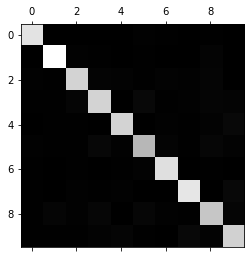

In [88]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
#save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

Les 5 paraissent sensiblement plus sombres que les autres chiffres, ce qui peut signifier qu'il y a moins d'images de 5 dans le jeu de données ou que le classificateur ne donne pas d'aussi bons résultats sur les 5 que sur les autres chiffres. En pratique, vous pouvez vérifier que les deux sont vrais.

In [89]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

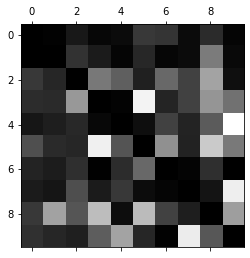

In [91]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
#save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

Les colonnes des classes 8 et 9 sont relativement claires, ce qui indique que beaucoup d'images sont identifiées par erreur comme des 8 ou des 9. De même, les lignes des classes 8 et 9 sont également relativement claires, ce qui veut dire que les 8 et les 9 sont souvent confondus avec d'autres chiffres. Inversement, certaines lignes sont relativement sombres, comme la ligne l : ceci signifie que la plupart des 1 sont classés correctement (quelques-uns sont confondus avec des 8, mais c'est à peu près tout). Notez que les erreurs ne sont pas parfaitement symétriques : il y a par exemple plus de 5 classés par erreur en 8 que l'inverse.

En observant cette représentation graphique, il semble que vos efforts devraient porter sur l'amélioration de la classification des 8 et des 9, ainsi que sur la correction du problème spécifique de confusion entre les 3 et les 5. Vous pourriez, par exemple, vous efforcer de rassembler davantage de données d'entraînement pour ces chiffres. Vous pourriez aussi concevoir de nouvelles variables qui aideraient le classificateur, en écrivant par exemple un algorithme pour compter le nombre de boucles fermées (le 8 en a deux, le 6 en a une, le 5 n'en a aucune). Vous pourriez également prétraiter  les images (p. ex. en utilisant Scikit-Image, Pillow ou OpenCV) afin de mieux mettre en évidence certaines structurations, comme par exemple les boucles fermées.

Imprimons par exemple des échantillons de 3 et de 5 :

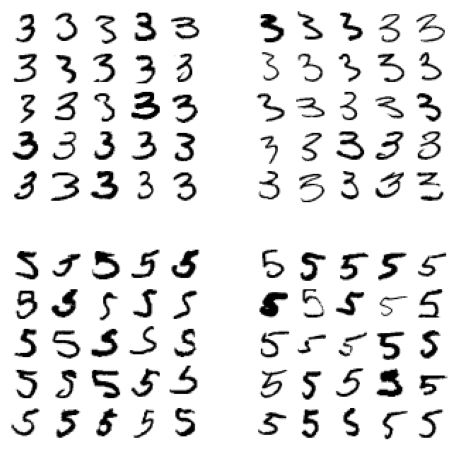

In [93]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
#save_fig("error_analysis_digits_plot")
plt.show()

Les deux blocs de 5x5 de gauche présentent des chiffres classés en 3, tandis que les deux blocs 5x5 de droite présentent des images classées en 5. Certains des chiffres sur lesquels le classificateur se trompe (p. ex. dans le bloc inférieur gauche et le bloc supérieur droit) sont si mal écrits que même un humain aurait du mal à les classer (p. ex. le 5 sur la huitième ligne et la première colonne ressemble vraiment à un 3). Néanmoins, la plupart des images mal classées nous paraissent être des erreurs évidentes et nous comprenons difficilement pourquoi le classificateur les a faites. 

Remarque. Mais n'oubliez pas que notre cerveau est un extraordinaire système de reconnaissance des formes et notre système visuel effectue un prétraitement important et complexe des informations avant même que nous en ayons conscience, c'est pourquoi cette apparente simplicité n'est pas forcément réelle.

L'explication, c'est que nous avons utilisé un simple SGDClassifier, qui est un modèle linéaire: il ne fait qu'affecter un poids par classe à chaque pixel, et lorsqu'il reçoit une nouvelle image, il se contente d'ajouter les intensités pondérées des pixels pour obtenir un score pour chaque classe. Etant donné que les 3 et les 5 ne diffèrent que par quelques pixels, ce modèle les confondra aisément.

La principale différence entre les 3 et les 5, c'est la position du petit trait qui relie la ligne du haut et l'arc du bas. Si vous tracez un 3 avec une jonction légèrement décalée vers la gauche, le classificateur risque de la classer en 5 et inversement. En d'autres termes, ce classificateur est assez sensible au décalage et à la rotation. Un des moyens de réduire la confusion entre les 3 et les 5 consisterait à prétraiter les images afin qu'elles soient bien centrées et pas trop inclinées. Cela contribuerait probablement à réduire également les autres erreurs.

## 3.4. KNeighborsClassifier

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = [{'weights' : ["uniform", "distance"], 'n_neighbors' : [3, 4, 5]}]

In [ ]:
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
grid_search.best_params_
grid_search.best_score_

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

### 3.4.1. Augmentation des données ou extension du jeu d'entraînement

In [ ]:
from scipy.ndimage.interpolation import shift

In [ ]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [ ]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

In [ ]:
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [ ]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

In [ ]:
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)


shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]


knn_clf = KNeighborsClassifier(**grid_search.best_params_)


knn_clf.fit(X_train_augmented, y_train_augmented)


y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

# 4. Classification multi-étiquettes

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

Ce code crée un tableau y_multilabel comportant deux étiquettes cibles pour chaque image numérique : la première indique si la valeur du chiffre est élevée (7, 8 ou 9) et la seconde indique si cette valeur est impaire. Les lignes suivantes créent une instance de KNeighborsClassifier (qui autorise la classification multi-étiquettes, ce qui n'est pas le cas de tous les classificateurs) et nous l'entraînons sur le tableau d'étiquettes multiples. Maintenant nous pouvons effectuer une prédiction,  et vous remarquerez que nous obtenons deux étiquettes :

In [ ]:
knn_clf.predict([some_digit])

Les résultats sont corrects ! Le chiffre 5 n'a pas une valeur élevée (False) et est impair (True).


Ce code calcule le score F1, moyen pour toutes les étiquettes :

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

Remarque. La cellule précédente peut nécessiter plusieurs heures en fonction de votre puissance.

# 5. Classification multi-sorties

Pour illustrer ceci, construisons un système qui supprime les aléas (ou bruit)  des images. Il reçoit en entrée une image numérique bruitée et transmet en sortie (espérons-le) une image numérique propre, représentée par un tableau d'intensités de pixels, tout comme les images MNIST. Notez que la sortie du classificateur est multi-étiquettes (une étiquette par pixel) et que chaque étiquette peut comporter plusieurs valeurs (l'intensité d'un pixel va de 0 à 255). Il s'agit donc d'un exemple de
système de classification multi-sorties.

Commençons par créer les jeux d'entraînement et de test en prenant les images MNIST et en utilisant la fonction randint de NumPy pour ajouter des aléas à leurs intensités de pixels. Les images cibles seront les images d'origine :

In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

Jetons un coup d'oeil à une image du jeu de test (oui, nous espionnons les donées de test, cela devrait vous faire froncer les sourcils) :

In [ ]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

Vous voyez à gauche l'image bruitée d'entrée, et à droite l'image propre ciblée. Entraînons maintenant le classificateur et faisons-lui nettoyer l'image :

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")

C'est assez proche du résultat souhaité ! 